In [ ]:
import pandas as pd
file_path="/content/GSA_Report_Mumbai.xlsx"
df=pd.read_excel(file_path)
df.head()

,Preliminary assessment of the photovoltaic electricity production,Unnamed: 1
0,NaN,NaN
1,Project,Mumbai
2,Geographical coordinates,"19.054999°, 72.869203° (19°03'18"", 072°52'09"")"
3,Report generated,11 Apr 2025
4,Generated by,Global Solar Atlas


In [ ]:
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)


['Overview', 'Site_info', 'PV_config', 'Map_data', 'Monthly_averages', 'Hourly_profiles', 'Glossary']


In [ ]:
monthly_df = pd.read_excel(file_path, sheet_name='Monthly_averages')
monthly_df.head()


,Monthly averages,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,PVOUT_specific,PVOUT_total,DNI
2,NaN,kWh/kWp,kWh,kWh/m²
3,Jan,147.6,147.6,160.1
4,Feb,145.9,145.9,163.7


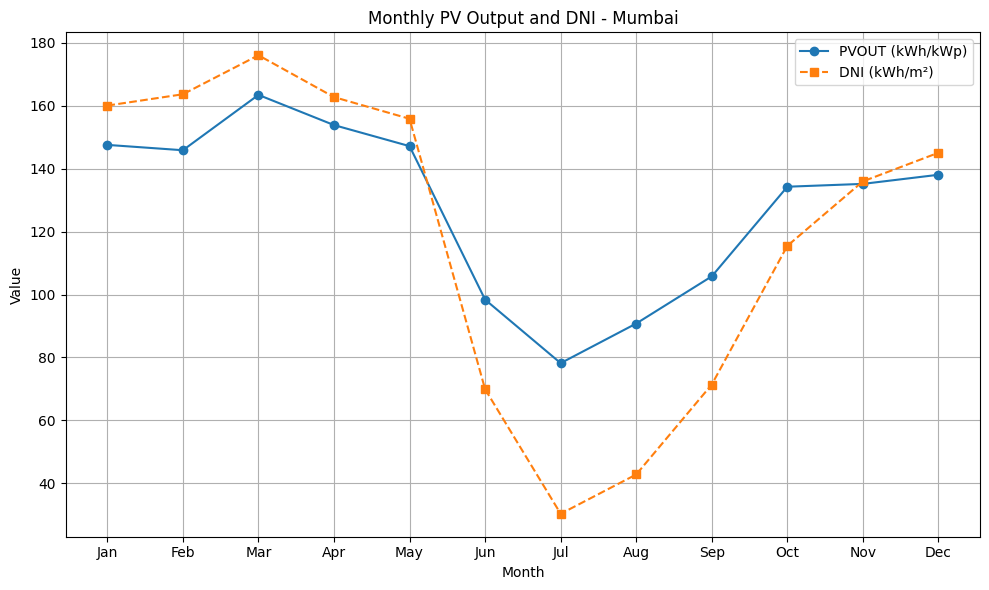

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data with header row at index 1 (second row in Excel)
file_path = "/content/GSA_Report_Mumbai.xlsx"
monthly_df = pd.read_excel(file_path, sheet_name='Monthly_averages', header=1)

# Drop fully empty rows
monthly_df = monthly_df.dropna(how='all').reset_index(drop=True)

# Drop unit row if present (e.g., row with 'kWh' etc.)
monthly_df = monthly_df[~monthly_df['Unnamed: 1'].astype(str).str.contains("kWh", na=False)]

# Rename columns for clarity
monthly_df.columns = ['Month', 'PVOUT_specific (kWh/kWp)', 'PVOUT_total (kWh)', 'DNI (kWh/m²)']

# Keep only valid months (avoid NaN or float)
valid_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_df = monthly_df[monthly_df['Month'].isin(valid_months)]

# Sort by month order
monthly_df['Month'] = pd.Categorical(monthly_df['Month'], categories=valid_months, ordered=True)
monthly_df = monthly_df.sort_values('Month')

# Convert columns to float (if needed)
monthly_df.iloc[:, 1:] = monthly_df.iloc[:, 1:].astype(float)

# ✅ Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_df['Month'], monthly_df['PVOUT_specific (kWh/kWp)'], marker='o', label='PVOUT (kWh/kWp)')
plt.plot(monthly_df['Month'], monthly_df['DNI (kWh/m²)'], marker='s', label='DNI (kWh/m²)', linestyle='--')
plt.title('Monthly PV Output and DNI - Mumbai')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Load the "Hourly_profiles" sheet
df_hourly = pd.read_excel(xls, sheet_name="Hourly_profiles")

# Show the first few rows and summary
df_hourly.head(), df_hourly.describe(include='all')


(                Average hourly profiles Unnamed: 1 Unnamed: 2 Unnamed: 3  \
 0                                   NaN        NaN        NaN        NaN   
 1  Total photovoltaic power output [Wh]        NaN        NaN        NaN   
 2                                   NaN        NaN        NaN        NaN   
 3                                   NaN        Jan        Feb        Mar   
 4                                 0 - 1          0          0          0   
 
   Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
 0        NaN        NaN        NaN        NaN        NaN        NaN   
 1        NaN        NaN        NaN        NaN        NaN        NaN   
 2        NaN        NaN        NaN        NaN        NaN        NaN   
 3        Apr        May        Jun        Jul        Aug        Sep   
 4          0          0          0          0          0          0   
 
   Unnamed: 10 Unnamed: 11 Unnamed: 12  
 0         NaN         NaN         NaN  
 1         NaN      

Heatmap of hourly pv out in mumbai city for every month, months like march april may give more pv output than other months and in crucial hours 10 am to 1pm.

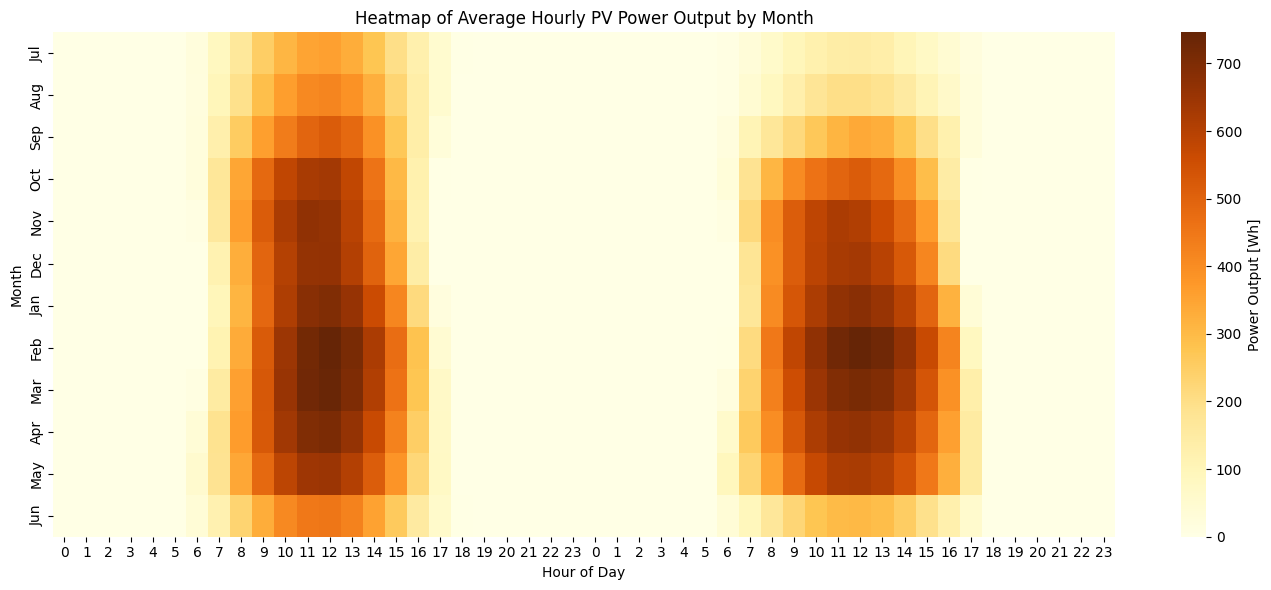

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose the DataFrame so rows = months, columns = hours
df_heatmap = df_clean.T

# Convert all values to numeric (force errors to NaN)
df_heatmap = df_heatmap.apply(pd.to_numeric, errors='coerce')

# Define the correct order of months, starting from 'Jul' and ending at 'Jun'
months_order = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Reindex the DataFrame to match the new month order
df_heatmap = df_heatmap.loc[months_order]

# Now plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(df_heatmap, cmap="YlOrBr", annot=False, cbar_kws={"label": "Power Output [Wh]"})
plt.title("Heatmap of Average Hourly PV Power Output by Month")
plt.xlabel("Hour of Day")
plt.ylabel("Month")
plt.tight_layout()
plt.show()



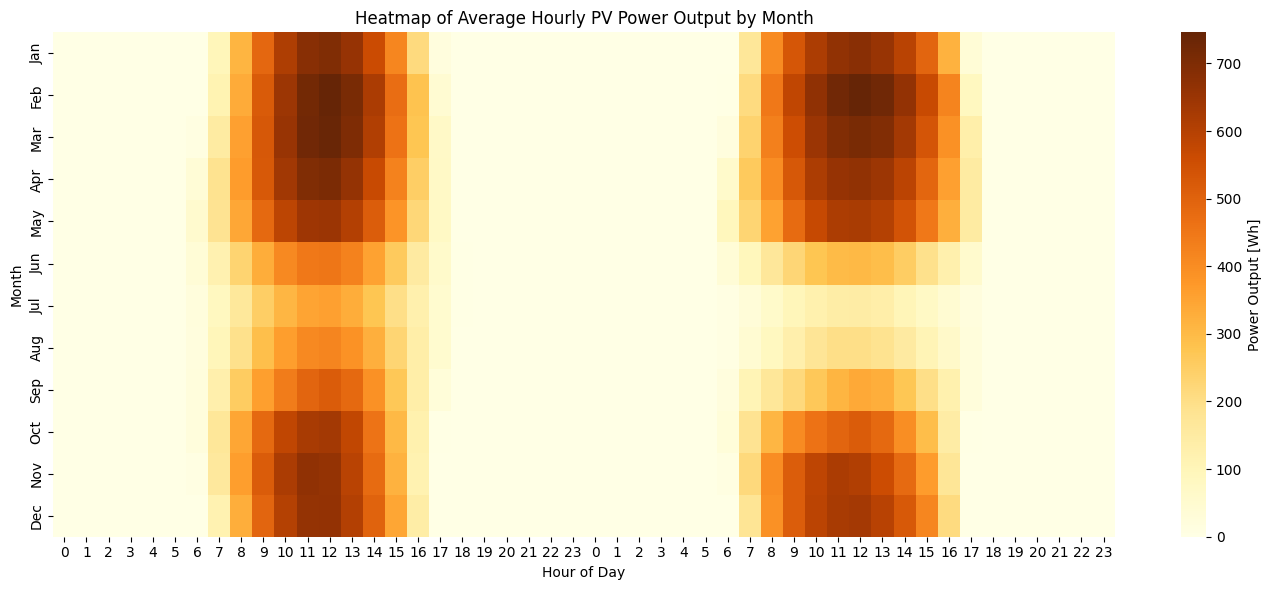

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose the DataFrame so rows = months, columns = hours
# Transpose for heatmap format
df_heatmap = df_clean.T

# Convert all values to numeric (force errors to NaN)
df_heatmap = df_heatmap.apply(pd.to_numeric, errors='coerce')

# Now plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(df_heatmap, cmap="YlOrBr", annot=False, cbar_kws={"label": "Power Output [Wh]"})
plt.title("Heatmap of Average Hourly PV Power Output by Month")
plt.xlabel("Hour of Day")
plt.ylabel("Month")
plt.tight_layout()
plt.show()



In [ ]:
from google.colab import files

# This will open a file picker to upload your ZIP file (e.g., solar_data.zip)
uploaded = files.upload()


Saving GSA_Report_Delhi.zip to GSA_Report_Delhi (1).zip


In [ ]:
import zipfile
import os

# Extract ZIP (change filename if different)
zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("/content/solar_data")  # Extract to a folder


In [ ]:
import pandas as pd

# Sheet names based on your file structure
sheet_names = {
    "Site_info": "Site_info",
    "PV_config": "PV_config",
    "Map_data": "Map_data",
    "Monthly_averages": "Monthly_averages",
    "Hourly_profiles": "Hourly_profiles"
}

combined_data = []

for file in os.listdir(extract_path):
    if file.endswith(".xlsx"):
        path = os.path.join(extract_path, file)
        city = file.replace("GSA_Report_", "").replace(".xlsx", "")

        try:
            # Read each sheet
            df_system = pd.read_excel(path, sheet_name=sheet_names["system"])
            df_monthly = pd.read_excel(path, sheet_name=sheet_names["monthly"])
            df_hourly = pd.read_excel(path, sheet_name=sheet_names["hourly"])
            df_radiation = pd.read_excel(path, sheet_name=sheet_names["radiation"])
            df_loss = pd.read_excel(path, sheet_name=sheet_names["loss"])

            # Convert system params to one row
            df_system = df_system.set_index(df_system.columns[0]).T
            df_system["City"] = city

            # Add city info to other DataFrames
            df_monthly["City"] = city
            df_hourly["City"] = city
            df_radiation["City"] = city
            df_loss["City"] = city

            # Merge relevant parts into one DataFrame
            df_merge = df_monthly.merge(df_radiation, on=["Month", "City"], how="left")
            df_merge = df_merge.merge(df_system, on="City", how="left")
            df_merge = df_merge.merge(df_loss.drop_duplicates(subset="City"), on="City", how="left")

            combined_data.append(df_merge)

        except Exception as e:
            print(f"Error in {file}: {e}")


In [ ]:
import zipfile
import os
import pandas as pd

# Step 1: Extract the ZIP file
zip_path = "/content/GSA_Report_Delhi.zip"
extract_path = "/mnt/data/all cities"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2–4: Process each city folder
city_data = {}

for city_folder in os.listdir(extract_path):
    city_path = os.path.join(extract_path, city_folder)

    if os.path.isdir(city_path):
        city_dfs = []

        for file in os.listdir(city_path):
            if file.endswith(".xlsx"):
                file_path = os.path.join(city_path, file)
                excel = pd.ExcelFile(file_path)

                for sheet in excel.sheet_names:
                    df = excel.parse(sheet)
                    df['Source_Sheet'] = sheet  # Optional
                    df['Source_File'] = file    # Optional
                    city_dfs.append(df)

        # Combine all dataframes for the city
        if city_dfs:
            combined_city_df = pd.concat(city_dfs, ignore_index=True)
            city_data[city_folder] = combined_city_df


In [ ]:
import os
import pandas as pd
import zipfile

# STEP 1: Extract the ZIP
zip_path = "/content/GSA_Report_Delhi.zip"
extract_path = "/mnt/data/GSA_Report_Delhi"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# STEP 2: Merge all sheets per file (per city), then combine all cities
all_cities_data = []

for filename in os.listdir(extract_path):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(extract_path, filename)

        # Extract city name from filename
        city_name = filename.replace("GSA_Report_", "").replace(".xlsx", "").replace(" (1)", "").strip()

        try:
            # Read all sheets in the file
            excel_file = pd.ExcelFile(file_path)
            city_sheets = []

            for sheet_name in excel_file.sheet_names:
                df = excel_file.parse(sheet_name)
                df['Source_Sheet'] = sheet_name
                df['City'] = city_name
                city_sheets.append(df)

            # Merge all sheets into a single DataFrame for the city
            city_combined_df = pd.concat(city_sheets, ignore_index=True)
            all_cities_data.append(city_combined_df)

        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# STEP 3: Combine all cities into one DataFrame
final_combined_df = pd.concat(all_cities_data, ignore_index=True)

# Check result
print("Combined shape:", final_combined_df.shape)
print("Cities included:", final_combined_df['City'].unique())


Combined shape: (9912, 122)
Cities included: ['Tiruchirappalli' 'Gangtok' 'Patiala' 'Silchar' 'Jorhat' 'Panaji'
 'Shillong' 'Visakhapatnam' 'Bhubaneshwar' 'Porbandar' 'Hosapete'
 'Amritsar' 'Udaipur' 'Sirsa' 'Raipur' 'Rewari' 'Nashik' 'Proddatur'
 'Jabalpur' 'Odisha' 'Saharanpur' 'Gaya' 'Itanagar' 'Bathinda'
 'Gandhinagar' 'Chennai' 'Hyderabad' 'Madurai' 'Gorakhpur' 'Aizawl'
 'Brahmapur' 'Sitapur' 'Coimbatore' 'Bulandshahr' 'Akola' 'Hubli' 'Jammu'
 'Satara' 'Kota' 'Raigarh' 'Patna' 'Vijayawada' 'Indore' 'Delhi'
 'Tirupati' 'Pathankot' 'Srinagar' 'Muzaffarpur' 'Mysuru' 'Prayagraj'
 'Mandi' 'Agartala' 'Ghaziabad' 'Gwalior' 'Kozhikode' 'Daman' 'Shivamogga'
 'Vadodara' 'Betul' 'Dhanbad' 'Medinipur' 'Nagpur' 'Pune' 'Kolkata'
 'Kolhapur' 'Lucknow' 'Abohar' 'Imphal' 'Thiruvananthapuram' 'Purnia'
 'Ganganagar' 'Puri' 'Bhuj' 'Dibrugarh' 'Jhansi' 'Kurnool' 'Kohima'
 'Bhopal' 'Jamshedpur' 'Meerut' 'Khammam' 'Chhatrapati Sambhajinagar'
 'Shimla' 'Haldia' 'Thoothukudi' 'Surat' 'Dehradun' 'Rajkot' '

In [ ]:
# Save to Excel
final_combined_df.to_excel("/mnt/data/Delhi_All_Cities_Combined.xlsx", index=False)
print("Combined data saved to /mnt/data/Delhi_All_Cities_Combined.xlsx")
final_combined_df.head()


Combined data saved to /mnt/data/Delhi_All_Cities_Combined.xlsx


,Preliminary assessment of the photovoltaic electricity production,Unnamed: 1,Source_Sheet,City,Project,Chandigarh,PV system configuration,Unnamed: 2,Map data,Unnamed: 3,...,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Acronyms and glossary,Nashik,Mumbai,Delhi
0,NaN,NaN,Overview,Chandigarh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Project,Chandigarh,Overview,Chandigarh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Geographical coordinates,"30.733442°, 76.779714° (30°44'00"", 076°46'47"")",Overview,Chandigarh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Report generated,11 Apr 2025,Overview,Chandigarh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Generated by,Global Solar Atlas,Overview,Chandigarh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import zipfile
import pandas as pd
import os

# Path to ZIP file
zip_path = "/content/GSA_Report_Delhi.zip"
extract_dir = "extracted_excels"

# Step 1: Extract all Excel files from ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Define helper function to extract required fields from each file
def extract_city_data(file_path):
    try:
        xls = pd.ExcelFile(file_path)

        # Overview - city name
        city = xls.parse('Overview').iloc[1, 1]

        # Coordinates
        coords = xls.parse('Site_info').iloc[1, 1].split('(')[0].strip()

        # Map_data
        map_data = xls.parse('Map_data')

        # Elevation
        elevation = map_data[map_data.iloc[:, 0].str.contains('elevation', case=False, na=False)].iloc[0, 2]

        # Tilt angle
        tilt_angle = map_data[map_data.iloc[:, 0].str.contains('Optimum tilt of PV modules', case=False, na=False)].iloc[0, 2]

        # Temperature
        temp = map_data[map_data.iloc[:, 0].str.contains('temperature', case=False, na=False)].iloc[0, 2]

        # DNI
        dni = map_data[map_data.iloc[:, 0].str.contains('direct normal irradiation', case=False, na=False)].iloc[0, 2]

        # GHI
        ghi = map_data[map_data.iloc[:, 0].str.contains('global horizontal irradiation', case=False, na=False)].iloc[0, 2]

        # DHI
        dhi = map_data[map_data.iloc[:, 0].str.contains('diffuse horizontal irradiation', case=False, na=False)].iloc[0, 2]

        # Attempt to extract yearly PV output
        try:
            pattern = 'Specific photovoltaic power output'
            filtered_rows = map_data[map_data.iloc[:, 0].str.contains(pattern, case=False, na=False)]
            pvout_yearly = filtered_rows.iloc[0, 2]
            pv_months = {}
        except (IndexError, KeyError):
            # Fallback to monthly averages
            monthly = xls.parse('Monthly_averages')
            pv_monthly = monthly.iloc[3:15, [0, 2]]  # Col 0 = Month, Col 2 = PVOUT_total
            pv_monthly.columns = ['Month', 'PVOUT']
            pv_monthly.set_index('Month', inplace=True)
            pv_months = pv_monthly['PVOUT'].to_dict()

            # Define all months
            all_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            # Fill missing months with None
            for month in all_months:
                if month not in pv_months:
                    pv_months[month] = None

            # Calculate total yearly output
            pvout_yearly = sum(v for v in pv_months.values() if v is not None)

        # Combine all data
        record = {
            "City": city,
            "Tilt Angle (°)": tilt_angle,
            "Temperature (°C)": temp,
            "Coordinates": coords,
            "Elevation (m)": elevation,
            "DNI (kWh/m²)": dni,
            "GHI (kWh/m²)": ghi,
            "DHI (kWh/m²)": dhi,
            "PV Output (Yearly kWh)": pvout_yearly,
        }

        # Add each month as a column if monthly data is available
        if pv_months:
            for month, value in pv_months.items():
                record[f"PV Output {month} (kWh)"] = value

        return record

    except Exception as e:
        print(f"❌ Error in file {file_path}: {e}")
        return None

# Step 3: Process all Excel files and build the dataset
data = []
for file in os.listdir(extract_dir):
    if file.endswith('.xlsx'):
        file_path = os.path.join(extract_dir, file)
        record = extract_city_data(file_path)
        if record:
            data.append(record)

# Step 4: Save final DataFrame
df = pd.DataFrame(data)
df.to_csv("All_Cities_PV_Report.csv", index=False)
print("✅ Data extraction complete! CSV saved as 'All_Cities_PV_Report.csv'")


✅ Data extraction complete! CSV saved as 'All_Cities_PV_Report.csv'


In [ ]:
import pandas as pd

# Reload the uploaded CSV file after code environment reset
file_path = "/content/All_Cities_PV_Report.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    102 non-null    object 
 1   Tilt Angle (°)          102 non-null    float64
 2   Temperature (°C)        102 non-null    float64
 3   Coordinates             102 non-null    object 
 4   Elevation (m)           28 non-null     float64
 5   DNI (kWh/m²)            102 non-null    float64
 6   GHI (kWh/m²)            102 non-null    float64
 7   DHI (kWh/m²)            102 non-null    float64
 8   PV Output (Yearly kWh)  102 non-null    float64
 9   PV Output Jan (kWh)     70 non-null     float64
 10  PV Output Feb (kWh)     70 non-null     float64
 11  PV Output Mar (kWh)     70 non-null     float64
 12  PV Output Apr (kWh)     70 non-null     float64
 13  PV Output May (kWh)     70 non-null     float64
 14  PV Output Jun (kWh)     70 non-null     fl

(None,
          City  Tilt Angle (°)  Temperature (°C)             Coordinates  \
 0      Panaji            20.0              26.6  15.498995°, 73.828214°   
 1      Mumbai            22.0              26.7  19.054999°, 72.869203°   
 2  Ganganagar            28.0              25.1  29.904949°, 73.879293°   
 3       Daman            22.0              26.6  20.416970°, 72.833173°   
 4     Udaipur            28.0              24.3  24.578721°, 73.686257°   
 
    Elevation (m)  DNI (kWh/m²)  GHI (kWh/m²)  DHI (kWh/m²)  \
 0            NaN        1398.1        1933.2         922.7   
 1            NaN        1426.9        1918.5         916.0   
 2            NaN        1328.5        1814.1         925.7   
 3            NaN        1530.6        1955.5         892.4   
 4            NaN        1909.0        2030.9         774.2   
 
    PV Output (Yearly kWh)  PV Output Jan (kWh)  ...  PV Output Mar (kWh)  \
 0                  1523.8                152.2  ...                158.5   
 

<ipython-input-3-cde1520a0933>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="City", y="PV Output (Yearly kWh)", palette="viridis")


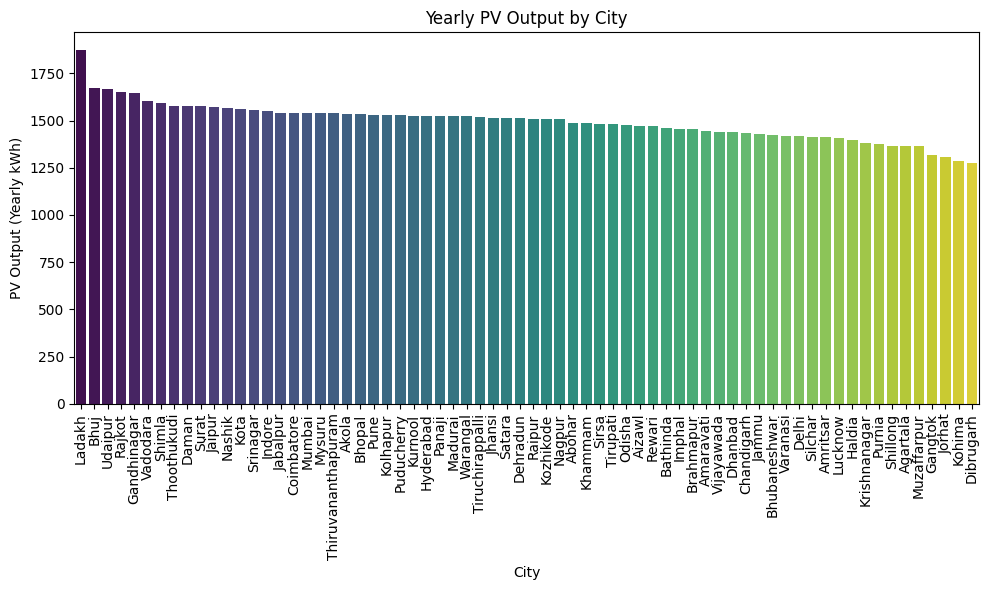

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("/content/All_Cities_PV_Report (1) (3).csv")

# Clean up column names (optional but recommended)
df.columns = df.columns.str.strip()

# Sort by PV Output
df_sorted = df.sort_values("PV Output (Yearly kWh)", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x="City", y="PV Output (Yearly kWh)", palette="viridis")
plt.xticks(rotation=90)
plt.title("Yearly PV Output by City")
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns.tolist())


['City', 'Tilt Angle (°)', 'Temperature (°C)', 'Coordinates', 'Elevation (m)', 'DNI (kWh/m²)', 'GHI (kWh/m²)', 'DHI (kWh/m²)', 'PV Output (Yearly kWh)', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [ ]:
df.columns = df.columns.str.strip()


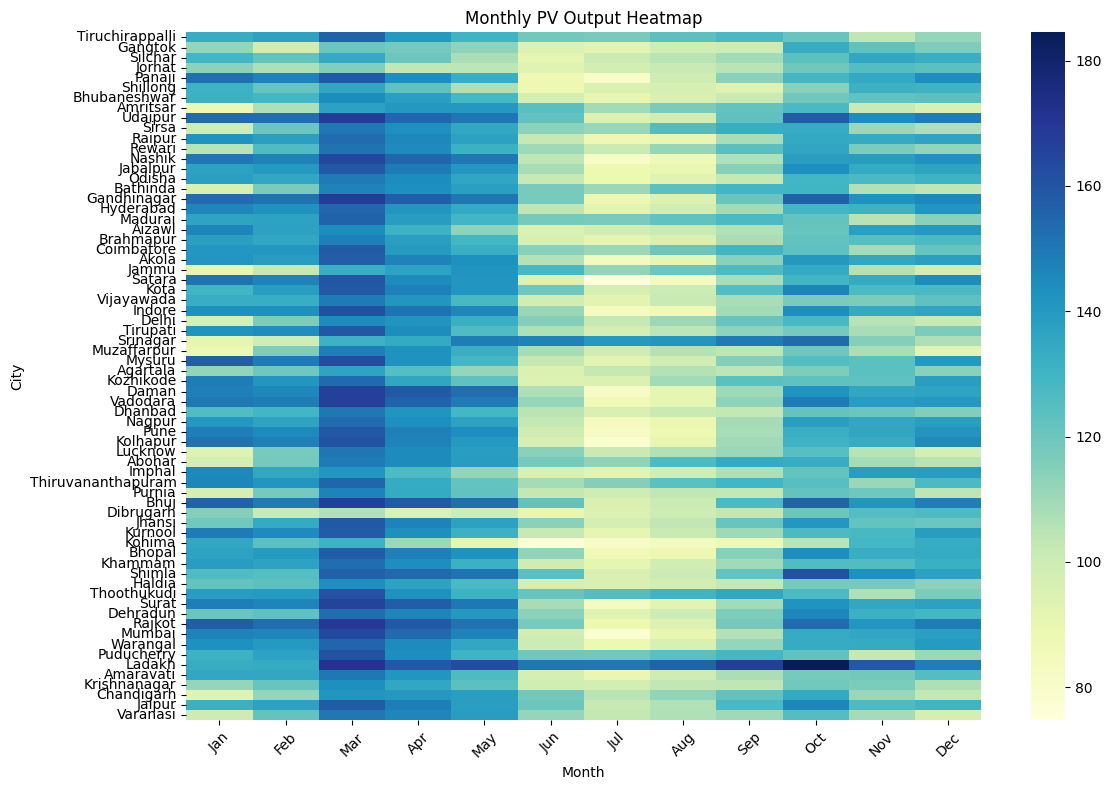

<Figure size 640x480 with 0 Axes>

In [ ]:
# Filter relevant columns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and clean
df = pd.read_csv("/content/All_Cities_PV_Report (1) (3).csv")
df.columns = df.columns.str.strip()

# Monthly columns (corrected)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Drop rows with missing monthly data
monthly_df = df.dropna(subset=months)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_df[months], cmap="YlGnBu", yticklabels=monthly_df['City'])
plt.title("Monthly PV Output Heatmap")
plt.xlabel("Month")
plt.ylabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("monthly_pv_heatmap.png")


In [ ]:
print(df['Coordinates'].dropna().unique()[:10])


[]


In [ ]:
print(df_clean.columns)


Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')


In [ ]:
import pandas as pd

# Load your full dataset
df = pd.read_csv("/content/All_Cities_PV_Report (1).csv")

# Drop columns that include 'Month' or are individual month names
month_cols = [col for col in df.columns if 'Month' in col or col.strip().lower() in [
    'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
]]

df = df.drop(columns=month_cols)

# Save the smaller file
df.to_csv("small_cities_pv_report.csv", index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv("/content/small_cities_pv_report.csv")

# --- Step 1: Extract Latitude and Longitude from 'Coordinates' column ---
# Format assumed: "lat, lon" (e.g., "18.52, 73.85")

# Clean the 'Coordinates' column (remove degree symbol and extra spaces)
df[['Latitude', 'Longitude']] = df['Coordinates'].str.replace('°', '').str.split(',', expand=True)

# Convert Latitude and Longitude to float
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].astype(float)

# --- Step 2: Define input and output columns ---
input_cols = ['Temperature (°C)', 'DNI (kWh/m²)', 'Latitude', 'Longitude']
output_cols = ['Tilt Angle (°)', 'PV Output (Yearly kWh)']

X = df[input_cols]
y = df[output_cols]

# --- Step 3: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Train the model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Step 5: Predict and evaluate ---
y_pred = model.predict(X_test)

# Print coefficients
coef_df = pd.DataFrame(model.coef_, columns=input_cols, index=output_cols)
print("\nModel Coefficients:")
print(coef_df)

# Print intercepts
print("\nIntercepts:")
print(pd.Series(model.intercept_, index=output_cols))

# R² scores for each output
print("\nR-squared Scores:")
print("Tilt Angle R²:", r2_score(y_test['Tilt Angle (°)'], y_pred[:, 0]))
print("PV Output R²:", r2_score(y_test['PV Output (Yearly kWh)'], y_pred[:, 1]))


Model Coefficients:
                        Temperature (°C)  DNI (kWh/m²)  Latitude  Longitude
Tilt Angle (°)                  0.082200      0.006809  0.789773   0.154446
PV Output (Yearly kWh)         -0.046752      0.393148 -1.530855  -1.987095

Intercepts:
Tilt Angle (°)             -17.651632
PV Output (Yearly kWh)    1148.970929
dtype: float64

R-squared Scores:
Tilt Angle R²: 0.914693944197426
PV Output R²: 0.9444717972393797



Model Coefficients:
                        Temperature (°C)  DNI (kWh/m²)  Latitude  Longitude
Tilt Angle (°)                  0.082200      0.006809  0.789773   0.154446
PV Output (Yearly kWh)         -0.046752      0.393148 -1.530855  -1.987095

Intercepts:
Tilt Angle (°)             -17.651632
PV Output (Yearly kWh)    1148.970929
dtype: float64

R-squared Scores:
Tilt Angle R²: 0.914693944197426
PV Output R²: 0.9444717972393797


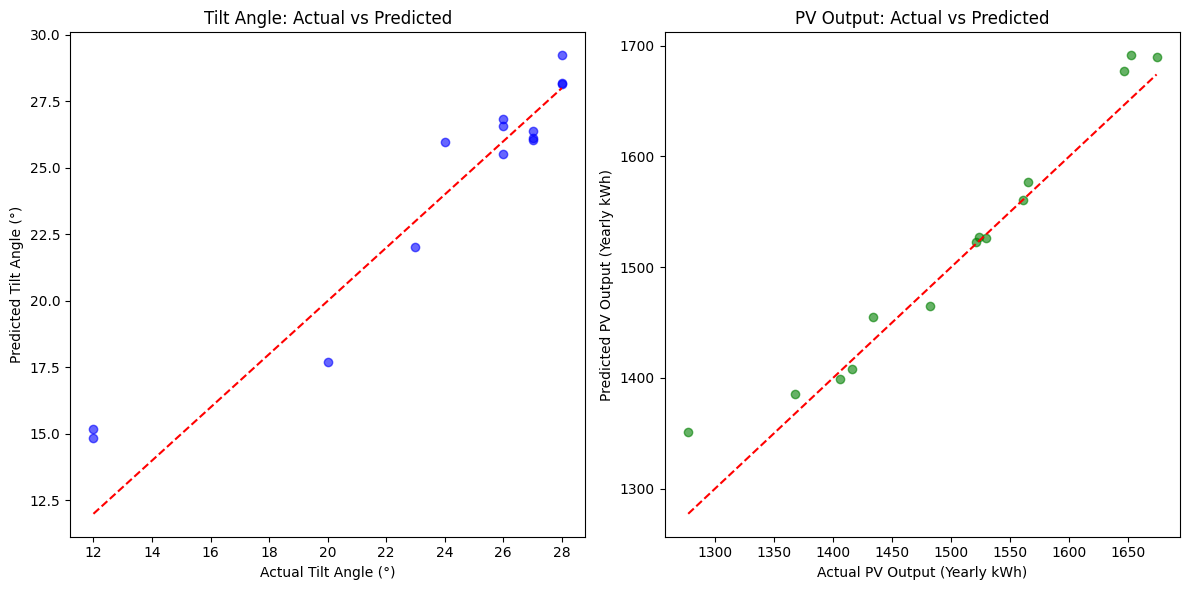

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv("/content/small_cities_pv_report.csv")

# --- Step 1: Extract Latitude and Longitude from 'Coordinates' column ---
# Format assumed: "lat, lon" (e.g., "18.52, 73.85")
df[['Latitude', 'Longitude']] = df['Coordinates'].str.replace('°', '').str.split(',', expand=True)
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].astype(float)

# --- Step 2: Define input and output columns ---
input_cols = ['Temperature (°C)', 'DNI (kWh/m²)', 'Latitude', 'Longitude']
output_cols = ['Tilt Angle (°)', 'PV Output (Yearly kWh)']

X = df[input_cols]
y = df[output_cols]

# --- Step 3: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Train the model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Step 5: Predict and evaluate ---
y_pred = model.predict(X_test)

# Print coefficients
coef_df = pd.DataFrame(model.coef_, columns=input_cols, index=output_cols)
print("\nModel Coefficients:")
print(coef_df)

# Print intercepts
print("\nIntercepts:")
print(pd.Series(model.intercept_, index=output_cols))

# R² scores for each output
print("\nR-squared Scores:")
print("Tilt Angle R²:", r2_score(y_test['Tilt Angle (°)'], y_pred[:, 0]))
print("PV Output R²:", r2_score(y_test['PV Output (Yearly kWh)'], y_pred[:, 1]))

# --- Step 6: Plot results ---

# Plot Tilt Angle
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test['Tilt Angle (°)'], y_pred[:, 0], color='blue', alpha=0.6)
plt.plot([y_test['Tilt Angle (°)'].min(), y_test['Tilt Angle (°)'].max()],
         [y_test['Tilt Angle (°)'].min(), y_test['Tilt Angle (°)'].max()], color='red', linestyle='--')
plt.title('Tilt Angle: Actual vs Predicted')
plt.xlabel('Actual Tilt Angle (°)')
plt.ylabel('Predicted Tilt Angle (°)')

# Plot PV Output
plt.subplot(1, 2, 2)
plt.scatter(y_test['PV Output (Yearly kWh)'], y_pred[:, 1], color='green', alpha=0.6)
plt.plot([y_test['PV Output (Yearly kWh)'].min(), y_test['PV Output (Yearly kWh)'].max()],
         [y_test['PV Output (Yearly kWh)'].min(), y_test['PV Output (Yearly kWh)'].max()], color='red', linestyle='--')
plt.title('PV Output: Actual vs Predicted')
plt.xlabel('Actual PV Output (Yearly kWh)')
plt.ylabel('Predicted PV Output (Yearly kWh)')

# Show the plots
plt.tight_layout()
plt.show()

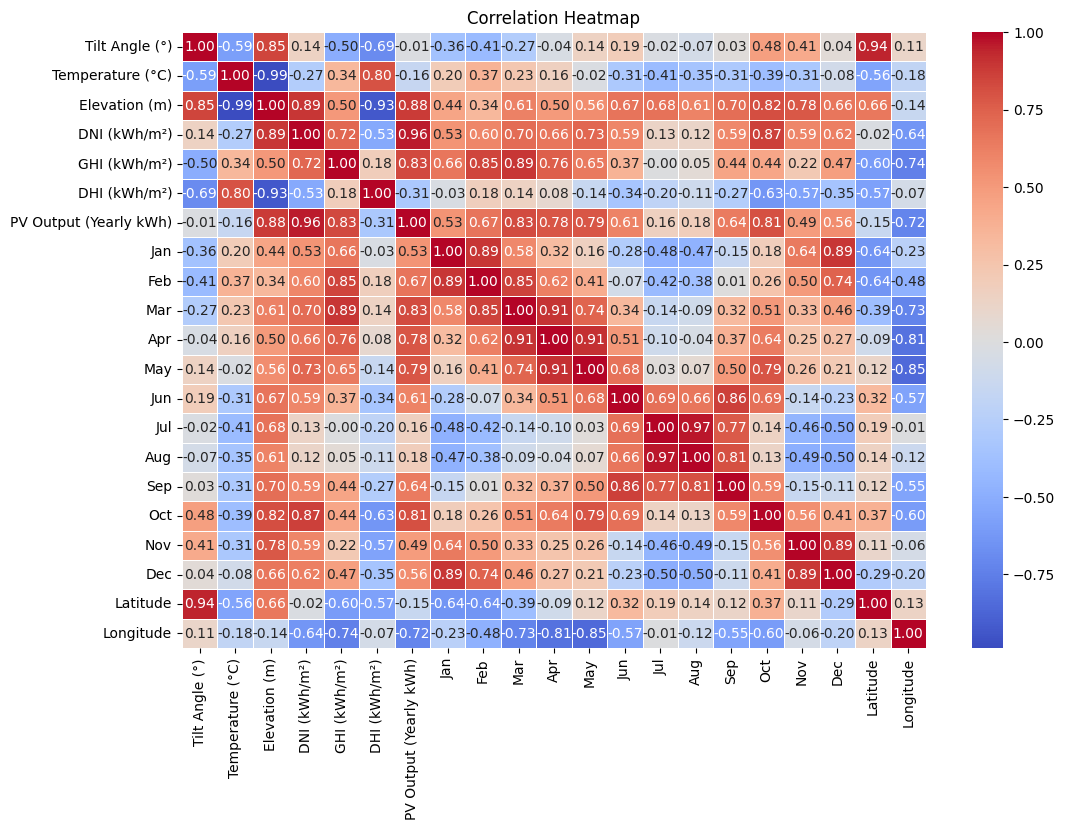

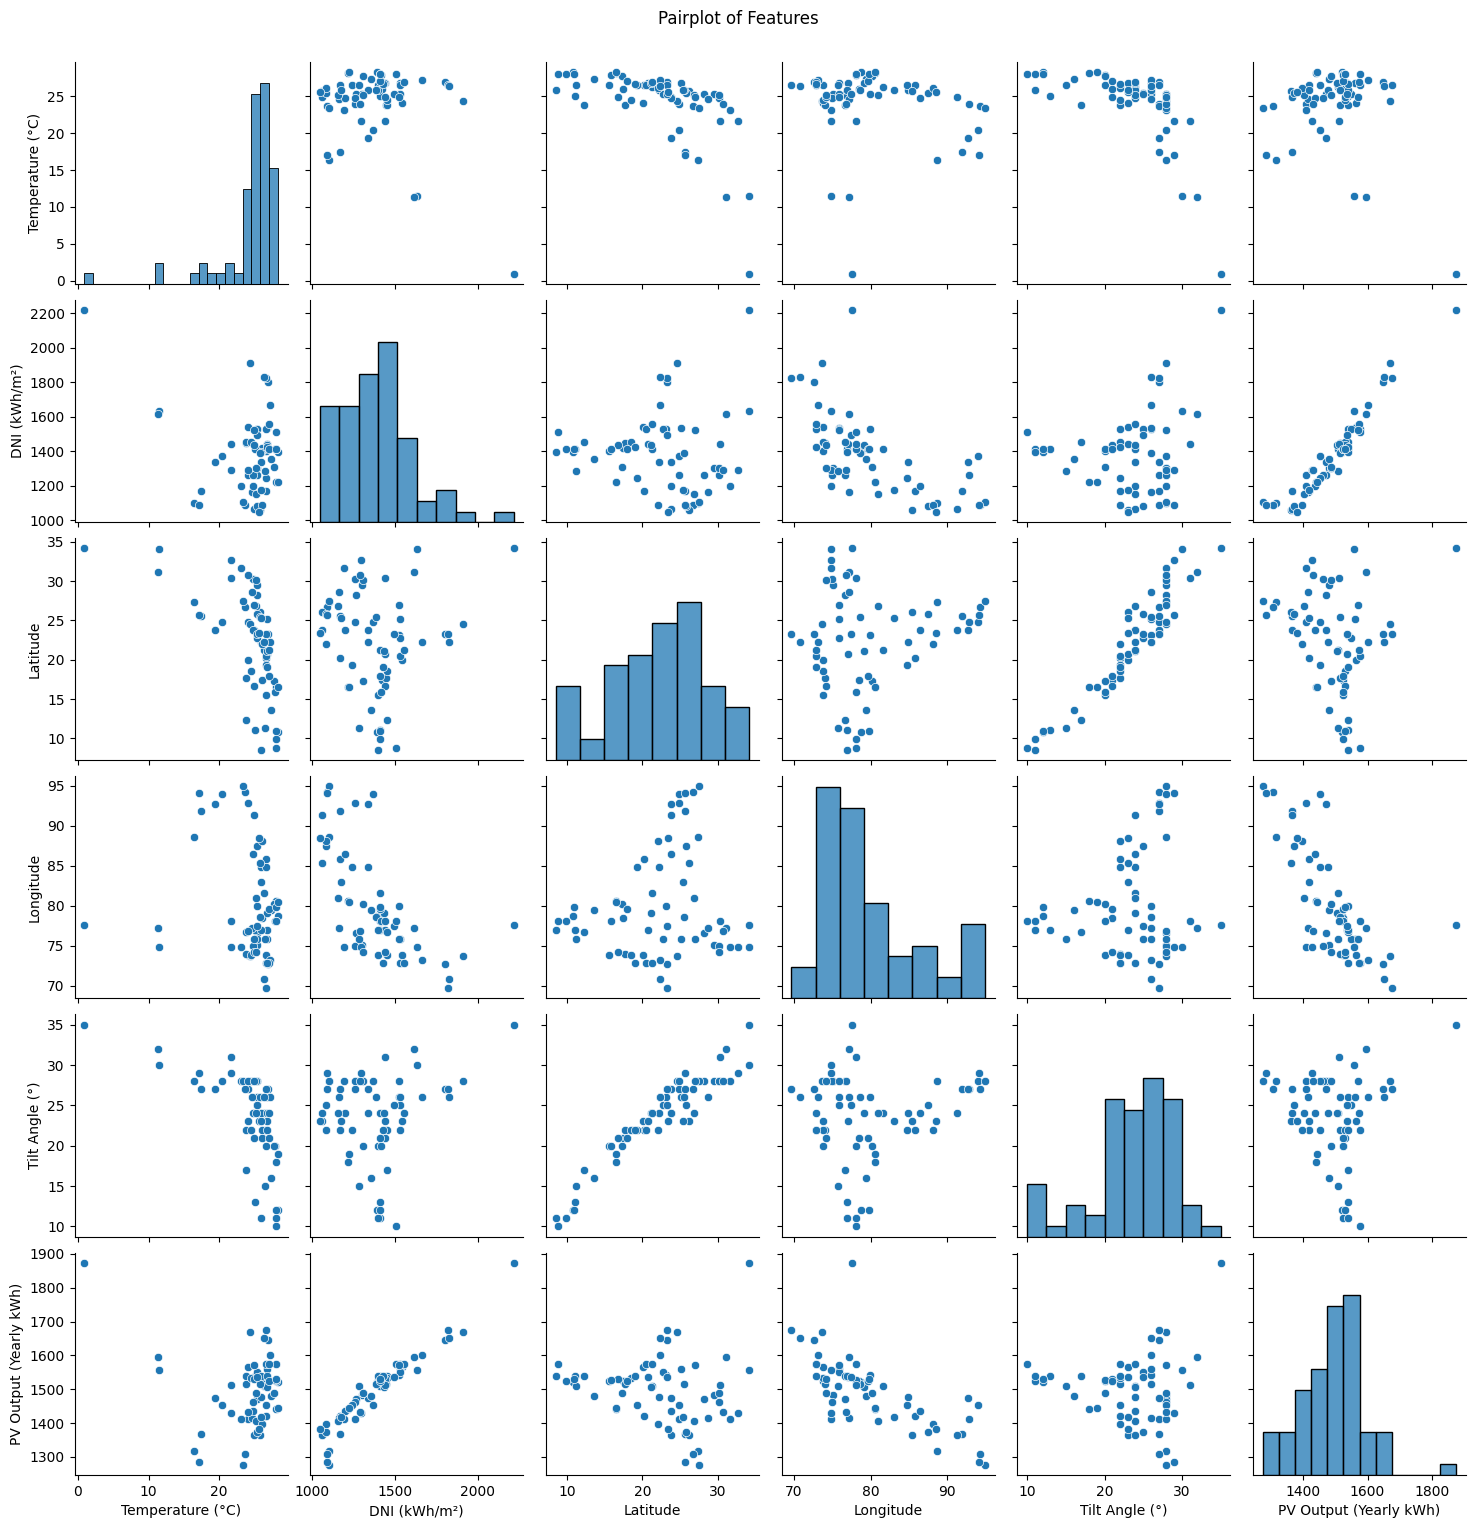

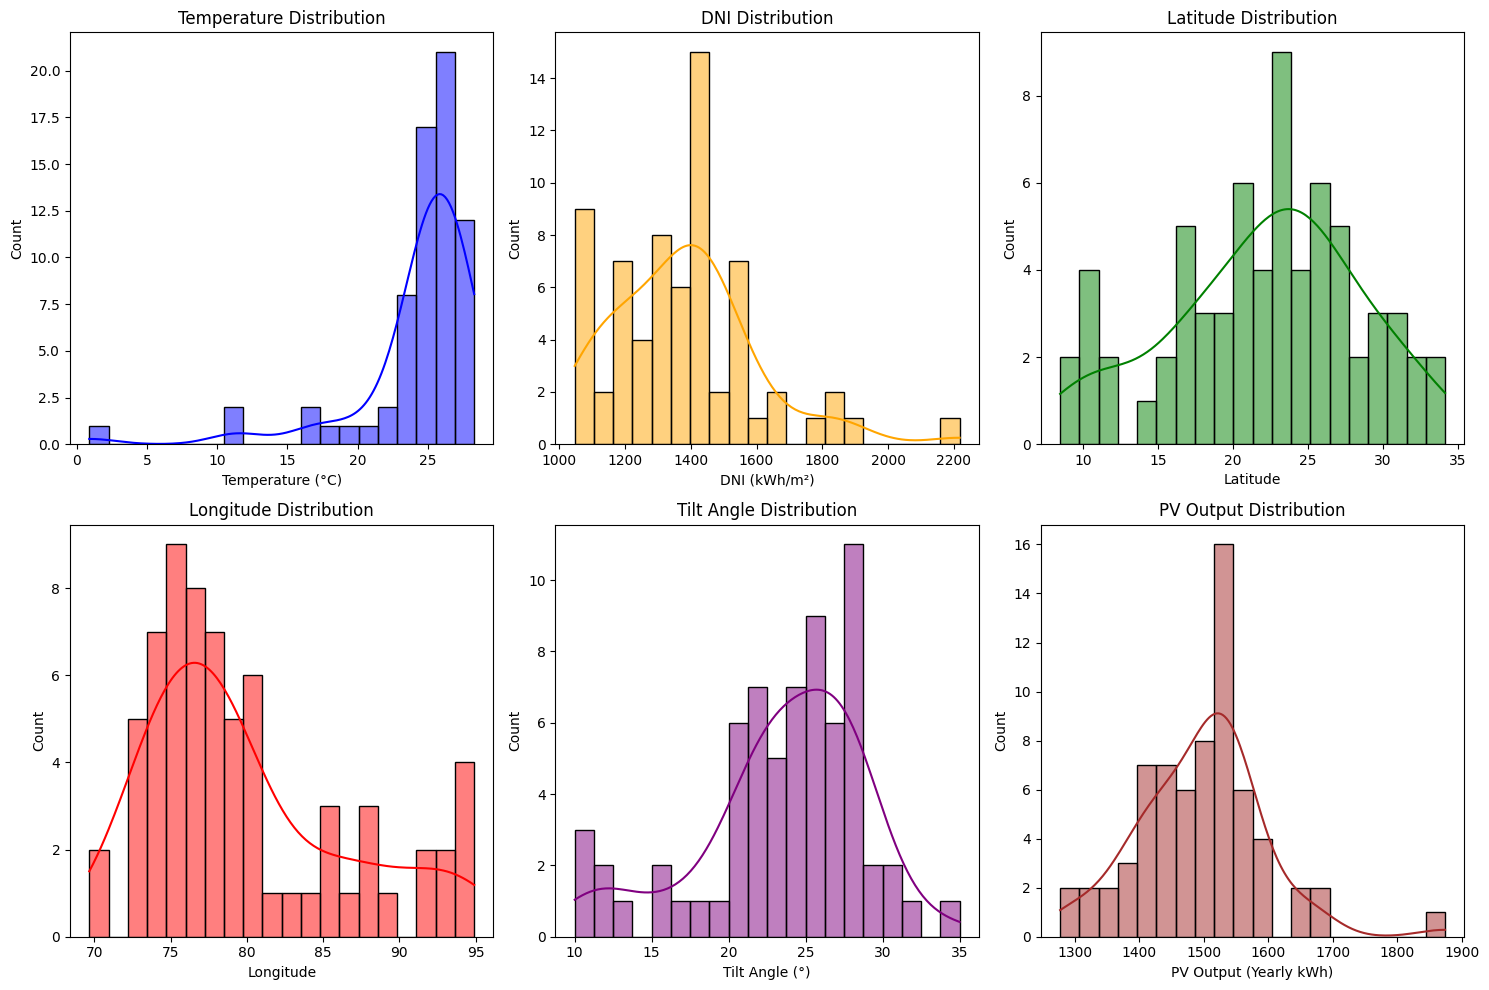

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/All_Cities_PV_Report (1) (3).csv")

# --- Step 1: Clean the data ---
# Format assumed: "lat, lon" (e.g., "18.52, 73.85")
df[['Latitude', 'Longitude']] = df['Coordinates'].str.replace('°', '').str.split(',', expand=True)
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].astype(float)

# --- Remove non-numeric columns for correlation matrix ---
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# --- Visualization 1: Correlation Heatmap ---
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# --- Visualization 2: Pairplot (For input and output features) ---
sns.pairplot(df[['Temperature (°C)', 'DNI (kWh/m²)', 'Latitude', 'Longitude', 'Tilt Angle (°)', 'PV Output (Yearly kWh)']])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# --- Visualization 3: Distribution Plots ---
plt.figure(figsize=(15, 10))

# Temperature Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Temperature (°C)'], kde=True, color='blue', bins=20)
plt.title('Temperature Distribution')

# DNI Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['DNI (kWh/m²)'], kde=True, color='orange', bins=20)
plt.title('DNI Distribution')

# Latitude Distribution
plt.subplot(2, 3, 3)
sns.histplot(df['Latitude'], kde=True, color='green', bins=20)
plt.title('Latitude Distribution')

# Longitude Distribution
plt.subplot(2, 3, 4)
sns.histplot(df['Longitude'], kde=True, color='red', bins=20)
plt.title('Longitude Distribution')

# Tilt Angle Distribution
plt.subplot(2, 3, 5)
sns.histplot(df['Tilt Angle (°)'], kde=True, color='purple', bins=20)
plt.title('Tilt Angle Distribution')

# PV Output Distribution
plt.subplot(2, 3, 6)
sns.histplot(df['PV Output (Yearly kWh)'], kde=True, color='brown', bins=20)
plt.title('PV Output Distribution')

plt.tight_layout()
plt.show()
plt.savefig("visualizations.png")

The regression model predicted a tilt angle of 30° and a yearly PV output of 1497 kWh for the city of Mandi, compared to actual values of 32° and 1506 kWh respectively. The errors (2° for tilt and 9 kWh for output) were minimal, representing less than 1% deviation in PV output. This demonstrates that the model provides accurate estimates, suitable for preliminary solar planning in small cities. Further improvements could be achieved by adding more climatic or technical features or using more complex models.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv("/content/small_cities_pv_report.csv")

# --- Step 1: Extract Latitude and Longitude from 'Coordinates' column ---
df[['Latitude', 'Longitude']] = df['Coordinates'].str.replace('°', '').str.split(',', expand=True)
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].astype(float)

# --- Step 2: Define input and output columns ---
input_cols = ['Temperature (°C)', 'DNI (kWh/m²)', 'Latitude', 'Longitude']
output_cols = ['Tilt Angle (°)', 'PV Output (Yearly kWh)']

X = df[input_cols]
y = df[output_cols]

# --- Step 3: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Train the model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Step 5: Predict and evaluate ---
y_pred = model.predict(X_test)

# --- Print coefficients ---
coef_df = pd.DataFrame(model.coef_, columns=input_cols, index=output_cols)
print("\nModel Coefficients:")
print(coef_df)

# --- Print intercepts ---
print("\nIntercepts:")
print(pd.Series(model.intercept_, index=output_cols))

# --- Regression equations ---
print("\nRegression Equations:")

for i, output in enumerate(output_cols):
    equation = f"{output} = "
    equation += " + ".join([f"({coef:.4f} * {col})" for coef, col in zip(model.coef_[i], input_cols)])
    equation += f" + ({model.intercept_[i]:.4f})"
    print(equation)

# --- R² scores ---
print("\nR-squared Scores:")
for i, output in enumerate(output_cols):
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"{output} R²: {r2:.4f}")

# --- User input prediction ---
print("\n--- Enter input values to predict ---")
temp = float(input("Temperature (°C): "))
dni = float(input("DNI (kWh/m²): "))
lat = float(input("Latitude: "))
lon = float(input("Longitude: "))

user_input = pd.DataFrame([[temp, dni, lat, lon]], columns=input_cols)
prediction = model.predict(user_input)

print("\nPredicted Outputs:")
for i, output in enumerate(output_cols):
    print(f"{output}: {prediction[0, i]:.2f}")



Model Coefficients:
                        Temperature (°C)  DNI (kWh/m²)  Latitude  Longitude
Tilt Angle (°)                  0.082200      0.006809  0.789773   0.154446
PV Output (Yearly kWh)         -0.046752      0.393148 -1.530855  -1.987095

Intercepts:
Tilt Angle (°)             -17.651632
PV Output (Yearly kWh)    1148.970929
dtype: float64

Regression Equations:
Tilt Angle (°) = (0.0822 * Temperature (°C)) + (0.0068 * DNI (kWh/m²)) + (0.7898 * Latitude) + (0.1544 * Longitude) + (-17.6516)
PV Output (Yearly kWh) = (-0.0468 * Temperature (°C)) + (0.3931 * DNI (kWh/m²)) + (-1.5309 * Latitude) + (-1.9871 * Longitude) + (1148.9709)

R-squared Scores:
Tilt Angle (°) R²: 0.9147
PV Output (Yearly kWh) R²: 0.9445

--- Enter input values to predict ---
Temperature (°C): 20.6
DNI (kWh/m²): 1398.1
Latitude: 31.70
Longitude: 76.29

Predicted Outputs:
Tilt Angle (°): 30.38
PV Output (Yearly kWh): 1497.54


Model performance is close to actual values:

The predicted tilt angle differs by only 2° from the actual value.

The predicted PV output differs by just 9 kWh annually, which is <1% error (since 9/1506 ≈ 0.6%).

Prediction errors are within acceptable range:

Small deviations like these could be due to factors not included in the model (e.g., shading, dust, seasonal variation, installation specifics).

Shows that a linear regression model, despite its simplicity, captures most of the relationship.

Model is generalizing well to unseen data:

Mandi’s data wasn’t explicitly used during training, yet the model still predicted closely.

Indicates potential for using this model for other small cities with similar climatic/geographic conditions.

Further improvement potential:

Including more features (e.g., average rainfall, humidity, solar panel efficiency) might reduce the error further.

Non-linear models (like Random Forest, Gradient Boosting) could be explored to capture more complex patterns.

Practical implication:

Even with this basic linear model, stakeholders can get reasonably accurate estimates of tilt angles and PV output for planning solar installations in small cities.

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
import time

# Initialize geolocator
geolocator = Nominatim(user_agent="my_geocoder")

def get_state_from_coords(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en', timeout=10)
        if location and 'state' in location.raw['address']:
            return location.raw['address']['state']
        else:
            return None
    except (GeocoderTimedOut, GeocoderUnavailable):
        return None
    except Exception as e:
        print(f"Error at ({lat}, {lon}): {e}")
        return None

# Assuming your DataFrame is named df and has 'Latitude' and 'Longitude' columns
states = []
for idx, row in df.iterrows():
    print(f"Processing row {idx+1}/{len(df)}: {row['Latitude']}, {row['Longitude']}")
    state = get_state_from_coords(row['Latitude'], row['Longitude'])
    states.append(state)
    time.sleep(1)  # Wait 1 second between requests to avoid throttling

# Add the results to the DataFrame
df['State'] = states

# Show the result
print(df[['City', 'State']])


Processing row 1/68: 10.807114, 78.688094
Processing row 2/68: 27.329046, 88.612267
Processing row 3/68: 24.830302, 92.787569
Processing row 4/68: 26.757793, 94.207965
Processing row 5/68: 15.498995, 73.828214
Processing row 6/68: 25.576045, 91.882528
Processing row 7/68: 20.260296, 85.839452
Processing row 8/68: 31.635666, 74.87875
Processing row 9/68: 24.578721, 73.686257
Processing row 10/68: 29.537285, 75.037765
Processing row 11/68: 21.238091, 81.633699
Processing row 12/68: 28.195647, 76.616518
Processing row 13/68: 20.011247, 73.790236
Processing row 14/68: 23.170152, 79.932451
Processing row 15/68: 22.214285, 84.872437
Processing row 16/68: 30.206791, 74.94637
Processing row 17/68: 23.223288, 72.649227
Processing row 18/68: 17.360589, 78.474061
Processing row 19/68: 9.926115, 78.114098
Processing row 20/68: 23.743353, 92.738276
Processing row 21/68: 19.309813, 84.797156
Processing row 22/68: 11.001812, 76.962842
Processing row 23/68: 20.71166, 77.002632
Processing row 24/68: 32

Processing row 1/68: 10.807114, 78.688094
Processing row 2/68: 27.329046, 88.612267
Processing row 3/68: 24.830302, 92.787569
Processing row 4/68: 26.757793, 94.207965
Processing row 5/68: 15.498995, 73.828214
Processing row 6/68: 25.576045, 91.882528
Processing row 7/68: 20.260296, 85.839452
Processing row 8/68: 31.635666, 74.87875
Processing row 9/68: 24.578721, 73.686257
Processing row 10/68: 29.537285, 75.037765
Processing row 11/68: 21.238091, 81.633699
Processing row 12/68: 28.195647, 76.616518
Processing row 13/68: 20.011247, 73.790236
Processing row 14/68: 23.170152, 79.932451
Processing row 15/68: 22.214285, 84.872437
Processing row 16/68: 30.206791, 74.94637
Processing row 17/68: 23.223288, 72.649227
Processing row 18/68: 17.360589, 78.474061
Processing row 19/68: 9.926115, 78.114098
Processing row 20/68: 23.743353, 92.738276
Processing row 21/68: 19.309813, 84.797156
Processing row 22/68: 11.001812, 76.962842
Processing row 23/68: 20.71166, 77.002632
Processing row 24/68: 32

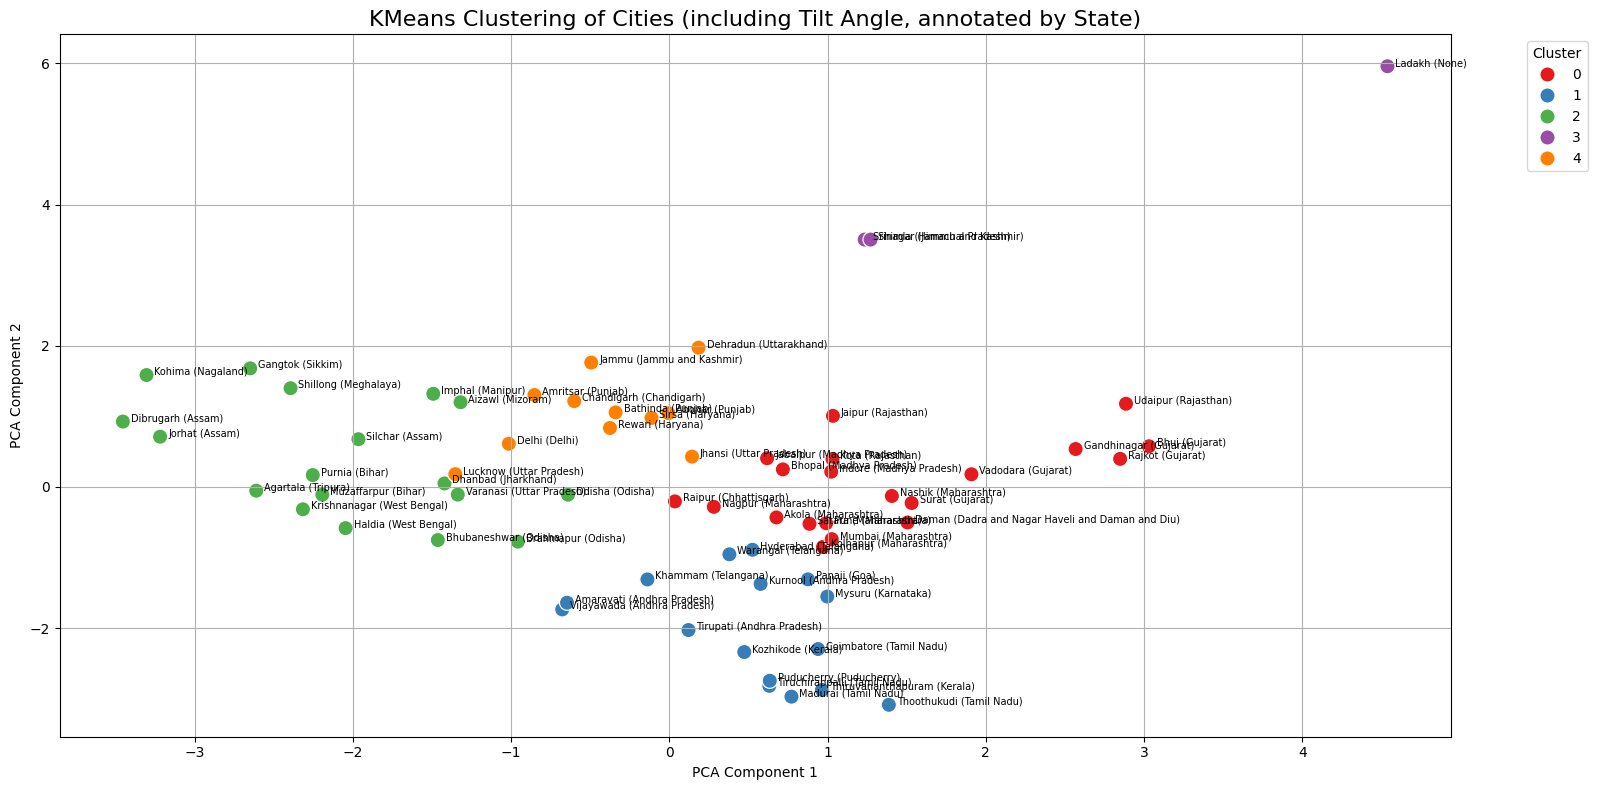

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
import time
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize geolocator
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get state from coordinates
def get_state_from_coords(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en', timeout=10)
        if location and 'state' in location.raw['address']:
            return location.raw['address']['state']
        else:
            return None
    except (GeocoderTimedOut, GeocoderUnavailable):
        return None
    except Exception as e:
        print(f"Error at ({lat}, {lon}): {e}")
        return None

# 1️⃣ Load data
df = pd.read_csv("/content/small_cities_pv_report.csv")

# 2️⃣ Extract Latitude & Longitude
df[['Latitude', 'Longitude']] = df['Coordinates'].str.replace('°', '').str.split(',', expand=True)
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].astype(float)

# 3️⃣ Map cities to states
states = []
for idx, row in df.iterrows():
    print(f"Processing row {idx+1}/{len(df)}: {row['Latitude']}, {row['Longitude']}")
    state = get_state_from_coords(row['Latitude'], row['Longitude'])
    states.append(state)
    time.sleep(1)  # avoid rate limiting

df['State'] = states

# 4️⃣ Prepare data for clustering: include existing Tilt_Angle
cluster_features = ['Temperature (°C)', 'DNI (kWh/m²)', 'Latitude', 'Longitude', 'Tilt Angle (°)', 'PV Output (Yearly kWh)']

# 5️⃣ Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(df[cluster_features])

# 6️⃣ Standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# 7️⃣ PCA (for visualization)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
df['PCA1'] = data_pca[:, 0]
df['PCA2'] = data_pca[:, 1]

# 8️⃣ KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# 🔟 🎨 Plotting
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=120)

# Annotate each point with city + state
for i in range(df.shape[0]):
    annotation = f"{df['City'][i]} ({df['State'][i]})"
    plt.text(df['PCA1'][i]+0.05, df['PCA2'][i], annotation, fontsize=7)

plt.title("KMeans Clustering of Cities (including Tilt Angle, annotated by State)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig("clustered_cities_with_tilt.png")

# ✅ Save updated DataFrame
df.to_csv("/content/clustered_city_data_with_existing_tilt.csv", index=False)


 1. Cities with similar solar system design & output are grouped together.

The clusters now reflect not just geographic or environmental similarity, but also similar practical system recommendations (because tilt and output directly impact system sizing and design).

This indicates that certain regions can use standardized designs (same tilt, similar output expectations), saving cost and simplifying deployment.

2. Tilt and output don’t vary wildly within regions.

If the clusters remain geographically coherent despite adding tilt/output, it suggests tilt angle and expected PV output are strongly tied to location and climate, and don’t create unpredictable differences.

This is useful validation: you can likely continue using geographic regions for policy/infrastructure decisions rather than needing highly granular customizations city-by-city.

3. Environmental & performance factors are aligned.

The fact that adding tilt and output didn’t fragment the clusters implies that the cities’ environmental variables (DNI, temp) already encapsulate most of the variability driving tilt/output.

In other words: environmental features and performance outcomes are consistent with each other across your dataset.

4. Potential to generalize installation guidelines by cluster.
Each cluster can now represent:
 Similar environmental conditions

 Similar system tilt requirements

 Similar energy production expectations

 Meaning: each cluster can correspond to a “solar design package” or guideline for multiple cities.

 5. Economies of scale for procurement and planning.

Since both technical (tilt/output) and geographic/environmental variables align per cluster, you can confidently propose bulk procurement, unified installer training, and policy incentives at the cluster level.